## ПЗАД

**ДЗ по лекции 1**

Студентки 1 курса магистратуры 517 группы Липкиной Анны

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

### Задание (оценка минимального контраста)

Если после дифференцирования задачи оптимизации производная выражается следующий образом:

$$\sum_{i=1}^n \psi(x_i - a) = \sum_{i=1}^n (x_i - a) \xi(x_i - a) = 0 $$

, то для вычисления $a$ применяется следующий способ ее вычисления:

$$a_{n+1} = \dfrac{\sum_{i=1}^n x_i \xi(x_i - a_n)}{\sum_{i=1}^n \xi(x_i - a_n)}$$

__Задание: Проверить применимость формулы__

### 1) Проверим применимость в контексте постановки задачи оптимизации для поиска среднего в одномерном случае:

$$\sum_{i=1}^n (x_i - a)^2 \to \min\limits_{a} \Leftrightarrow -2\sum_{i=1}^n (x_i - a) = 0 \Rightarrow \xi(x_i - a) = 1 \Rightarrow$$

$$ a  = \dfrac{\sum_{i=1}^n x_i}{\sum_{i=1}^n 1} = mean(\{x_i\}_{i=1}^n)$$
Результат совпадает с честым решением задачи оптимизации

### 2) Проверим применимость в контексте постановки задачи оптимизации для поиска медианы в одномерном случае:

$$ \sum_{i=1}^n |x_i - a| \to \min\limits_{a} $$ --- недифференцируемая функция, значит формула неприменима

Далее я решила поисследовать оптимальность данного решения для некоторых задач оптимизации:

### 3) Задачи оптимизации вида $\sum_{i=1}^n f(x_i, a) \to \min\limits_{a},~~f(x_i, a) =  (x_i - a)^n, n \geqslant 3, n \in \mathbb{N}$

При дифференцировании такой задачи оптимизации и приравнивании производной нулю получаем не всегда решаемое уравнение в $\mathbb{R}$, так как это задача поиска корней многочлена $(n - 1)$-й степени.

Исследуем при $n = 3$:
$$\sum_{i=1}^n(x_i - a)^3 \to \min\limits_{a} \Leftrightarrow -3\sum_{i=1}^n (x_i - a)^2 = 0 \Leftrightarrow$$
$$ n a^2 - 2a\sum_{i=1}^n x_i + \sum_{i=1}^n x_i^2 = 0 $$
$$D = 4(\sum_{i=1}^n x_i)^2 - 4n\sum_{i=1}^n x_i^2$$

И тут я задумалась, что $D$ может быть отрицательным... Исследуем этот вопрос. Методом легкого подбора при $n = 2$ и $x_1 = 1, x_2 = 2$ получаем $D < 0$:

$$ D = 4 \cdot (1 + 2)^2 - 4 \cdot 4 (1 + 4) = 4 \cdot 9 - 16 \cdot 5 < 0 $$

In [2]:
grid = np.linspace(-1000, 1000, 10**5)
grid

array([-1000.       ,  -999.9799998,  -999.9599996, ...,   999.9599996,
         999.9799998,  1000.       ])

In [3]:
f1 = (2 - grid) ** 3
f2 = (1 - grid) ** 3
grad_1 = (-3) * (2 - grid) ** 2
grad_2 = (-3) * (1 - grid) ** 2

Text(0.5,1,'optimizing function')

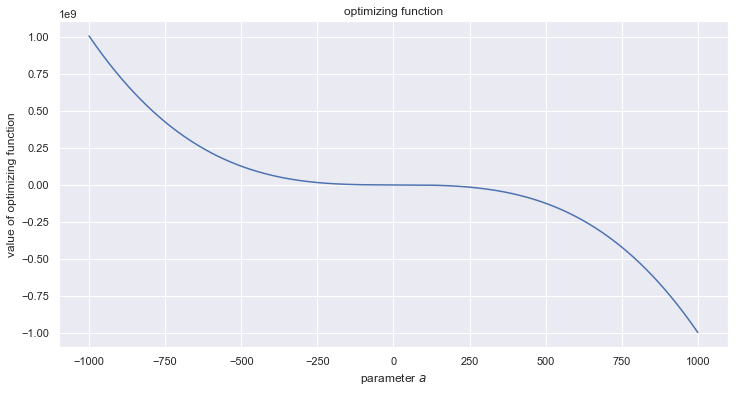

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(grid, (f1 + f2) / 2)
plt.xlabel("parameter $a$")
plt.ylabel("value of optimizing function")
plt.title("optimizing function")

Text(0.5,1,'gradient of optimizing function')

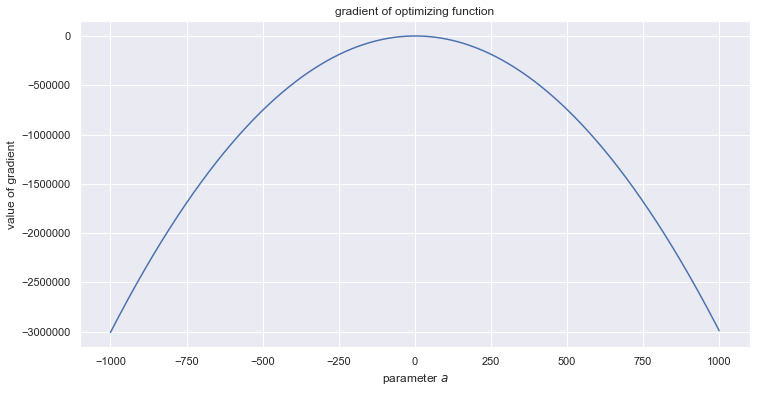

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(grid, (grad_1 + grad_2) / 2)
plt.xlabel("parameter $a$")
plt.ylabel("value of gradient")
plt.title("gradient of optimizing function")

По сетке видно, что градиент всегда < 0:

In [9]:
np.all((grad_1 + grad_2) < 0)

True

Ну вообще это видно и потому, что $D < 0$ все-таки. Отсюда следует, что у оптимизируемой функции нет локальных минимумов -- функция все время убывает.

Посмотрим, какую точку найдет итерационный алгоритм. Так как итерационный алгоритм зависит от начального приближения, запустим этот алгоритм из 3 различных точек (график оптимизируемой функции разбивается на 3 части --- "левее плато", "плато", "правее плато")

In [50]:
def oracle_polynom(x_args, a, n=3):
    """
    return (value of func, grad of func, [xi(x_i - a)])
    """
    func, grad, xi = (x_args - a) ** n, (x_args - a) ** (n - 1), (x_args - a) ** (n - 2)
    return np.mean(func), np.mean(grad), xi

def oracle_poly_3(x_args, a):
    return oracle_polynom(x_args, a, 3)

In [62]:
def minimum_contrast(oracle, x_args, a_init, EPS=10**(-4), max_iter=1000):
    a_history = [a_init]
    for i in range(max_iter):
        _, _, xis = oracle(x_args, a_history[-1])
        #print(xis)
        numerator = x_args.dot(xis)
        #print(numerator)
        if len(x_args) == 1:
            a_history.append(x_args[0])
        else:
            if np.abs(numerator) < 10 ** (-8):
                a_history.append(numerator)
            else:
                a_history.append(numerator / np.sum(xis))
        if np.abs(a_history[-1] - a_history[-2]) < EPS:
            break
    return np.array(a_history)

In [26]:
x_args = np.array([1, 2])

In [27]:
a_opt_left = minimum_contrast(oracle_poly_3, x_args, -1000)
a_opt_mid = minimum_contrast(oracle_poly_3, x_args, 0)
a_opt_right = minimum_contrast(oracle_poly_3, x_args, 1000)

In [28]:
a_opt_left[-10:]

[1.5002496255616575,
 -999.9999999999372,
 1.5002496255616575,
 -999.9999999999372,
 1.5002496255616575,
 -999.9999999999372,
 1.5002496255616575,
 -999.9999999999372,
 1.5002496255616575,
 -999.9999999999372]

In [29]:
a_opt_mid[-10:]

[1.6666666666666667,
 -2.220446049250313e-16,
 1.6666666666666667,
 -2.220446049250313e-16,
 1.6666666666666667,
 -2.220446049250313e-16,
 1.6666666666666667,
 -2.220446049250313e-16,
 1.6666666666666667,
 -2.220446049250313e-16]

In [30]:
a_opt_right[-10:]

[1.499749624436655,
 1000.0000000002648,
 1.499749624436655,
 1000.0000000002648,
 1.499749624436655,
 1000.0000000002648,
 1.499749624436655,
 1000.0000000002648,
 1.499749624436655,
 1000.0000000002648]

Как мы видим, алгоритм "мечется" между двумя огнями (то есть даже не проваливается в $+\inf$, что будет очевидно делать градиентный спуск)

В случае с одной точкой $x_1 = 1$:

In [33]:
x_args = np.array([1])

Text(0.5,1,'optimizing function')

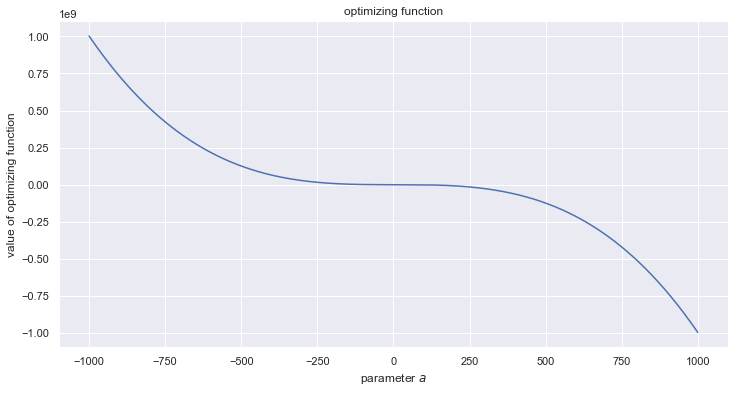

In [36]:
plt.figure(figsize=(12, 6))
plt.plot(grid, [oracle_poly_3(x_args, a)[0] for a in grid])
plt.xlabel("parameter $a$")
plt.ylabel("value of optimizing function")
plt.title("optimizing function")

In [40]:
a_opt_left = minimum_contrast(oracle_poly_3, x_args, -1000, max_iter=10)
a_opt_mid = minimum_contrast(oracle_poly_3, x_args, 0, max_iter=10)
a_opt_right = minimum_contrast(oracle_poly_3, x_args, 1000, max_iter=10)

In [41]:
a_opt_left

[-1000, 1, 1]

In [42]:
a_opt_mid

[0, 1, 1]

In [43]:
a_opt_right

[1000, 1, 1]

Как видим, итерационный алгоритм находит точку перегиба (производная в ней действительно равна 0), но даже при инициализации $a=1000$ алгоритм не устремляет $a$ к $+\infty$. Опять же, очевидно, что градиентный спуск выдал бы либо $a = 1$ (если это был градиентный спуск с затухающим градиентом, и то не факт), либо $a$ стремились бы к $+\infty$ (особенно при инициализации $a=1000$)

**Посмотрим при $n = 4$:**

In [48]:
def oracle_poly_4(x_args, a):
    return oracle_polynom(x_args, a, 4)

Text(0.5,1,'optimizing function')

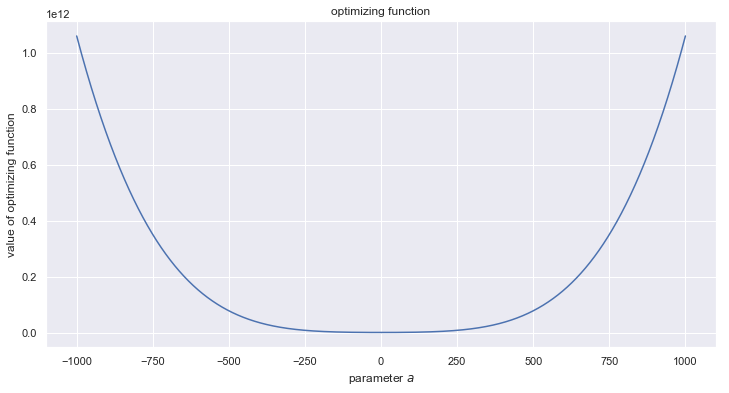

In [54]:
x_args = np.array([-100, 100])
plt.figure(figsize=(12, 6))
plt.plot(grid, [oracle_poly_4(x_args, a)[0] for a in grid])
plt.xlabel("parameter $a$")
plt.ylabel("value of optimizing function")
plt.title("optimizing function")

Text(0.5,1,'gradient of optimizing function')

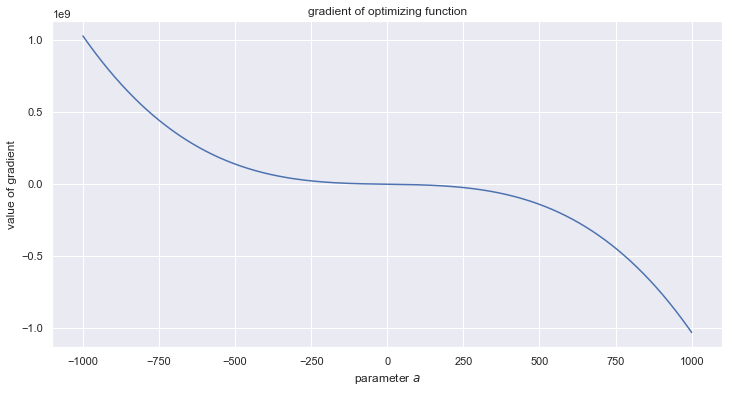

In [55]:
plt.figure(figsize=(12, 6))
plt.plot(grid, [oracle_poly_4(x_args, a)[1] for a in grid])
plt.xlabel("parameter $a$")
plt.ylabel("value of gradient")
plt.title("gradient of optimizing function")

In [64]:
a_opt_left = minimum_contrast(oracle_poly_4, x_args, -1000, max_iter=50)
a_opt_mid = minimum_contrast(oracle_poly_4, x_args, 0, max_iter=50)
a_opt_right = minimum_contrast(oracle_poly_4, x_args, 1000, max_iter=50)

In [65]:
a_opt_left

array([-1000.        ,    19.8019802 ,   -38.1096123 ,    66.55339226,
         -92.24722349,    99.6752728 ,   -99.99947105,   100.        ,
        -100.        ,   100.        ,  -100.        ,   100.        ,
        -100.        ,   100.        ,  -100.        ,   100.        ,
        -100.        ,   100.        ,  -100.        ,   100.        ,
        -100.        ,   100.        ,  -100.        ,   100.        ,
        -100.        ,   100.        ,  -100.        ,   100.        ,
        -100.        ,   100.        ,  -100.        ,   100.        ,
        -100.        ,   100.        ,  -100.        ,   100.        ,
        -100.        ,   100.        ,  -100.        ,   100.        ,
        -100.        ,   100.        ,  -100.        ,   100.        ,
        -100.        ,   100.        ,  -100.        ,   100.        ,
        -100.        ,   100.        ,  -100.        ])

In [66]:
a_opt_mid

array([0, 0])

In [67]:
a_opt_right

array([1000.        ,  -19.8019802 ,   38.1096123 ,  -66.55339226,
         92.24722349,  -99.6752728 ,   99.99947105, -100.        ,
        100.        , -100.        ,  100.        , -100.        ,
        100.        , -100.        ,  100.        , -100.        ,
        100.        , -100.        ,  100.        , -100.        ,
        100.        , -100.        ,  100.        , -100.        ,
        100.        , -100.        ,  100.        , -100.        ,
        100.        , -100.        ,  100.        , -100.        ,
        100.        , -100.        ,  100.        , -100.        ,
        100.        , -100.        ,  100.        , -100.        ,
        100.        , -100.        ,  100.        , -100.        ,
        100.        , -100.        ,  100.        , -100.        ,
        100.        , -100.        ,  100.        ])

Найдем оптимальную точку оптимизируемой функции вида:
$$f(b, a) = (b - a)^4 + (-b - a)^4 \to \min\limits_{a}$$

$$f(b, a) = (b^2 + a^2 - 2ab)^2 + (b^2 + a^2 + 2ab)^2 = 2(b^2 + a^2)^2 + 8a^2b^2 - 4ab(a^2 + b^2) + 2ab(a^2 + b^2) = 2b^4 + 2a^4 + 12a^2b^2 \to \min\limits_{a} \Rightarrow$$

$$a = 0$$

Как мы видим выше, оптимальная точка была найдена только в одном случае -- при инициализации $a = 0$, в остальных случаях выдаваемые итерационной формулой оптимальные $a$ чередуются: $100, -100...$

Посмотрим, как поведет себя формула, елси проинициализировать $a$ рядом с $0$:

In [71]:
a_around_opt = minimum_contrast(oracle_poly_4, x_args, 1, max_iter=50)

In [72]:
a_around_opt

array([   1.        ,   -1.99980002,    3.99800116,   -7.98324189,
         15.86537037,  -30.95165666,   56.49140792,  -85.64962836,
         98.81209712,  -99.99286012,   99.99999975, -100.        ,
        100.        , -100.        ,  100.        , -100.        ,
        100.        , -100.        ,  100.        , -100.        ,
        100.        , -100.        ,  100.        , -100.        ,
        100.        , -100.        ,  100.        , -100.        ,
        100.        , -100.        ,  100.        , -100.        ,
        100.        , -100.        ,  100.        , -100.        ,
        100.        , -100.        ,  100.        , -100.        ,
        100.        , -100.        ,  100.        , -100.        ,
        100.        , -100.        ,  100.        , -100.        ,
        100.        , -100.        ,  100.        ])

In [73]:
a_around_opt = minimum_contrast(oracle_poly_4, x_args, -1, max_iter=50)

In [74]:
a_around_opt

array([  -1.        ,    1.99980002,   -3.99800116,    7.98324189,
        -15.86537037,   30.95165666,  -56.49140792,   85.64962836,
        -98.81209712,   99.99286012,  -99.99999975,  100.        ,
       -100.        ,  100.        , -100.        ,  100.        ,
       -100.        ,  100.        , -100.        ,  100.        ,
       -100.        ,  100.        , -100.        ,  100.        ,
       -100.        ,  100.        , -100.        ,  100.        ,
       -100.        ,  100.        , -100.        ,  100.        ,
       -100.        ,  100.        , -100.        ,  100.        ,
       -100.        ,  100.        , -100.        ,  100.        ,
       -100.        ,  100.        , -100.        ,  100.        ,
       -100.        ,  100.        , -100.        ,  100.        ,
       -100.        ,  100.        , -100.        ])

Все равно оптимальное значение не находится. К слову градиентный бы спуск тут точно справился -- функция выпукла и с одним минимумом.

### 4) Вывод

**Положительные свойства алгоритма:**
* с поиском среднего через задачу оптимизации итерационный алгоритм сходится за 1 шаг -- очевидно, быстрее и точнее, чем градиентый спуск!

**Такие себе свойства алгоритма:**
* Что-то с более сложными задачами оптимизации алгоритм совсем не справляется. Конечно, искать минимум у неограниченной снизу функции на $\mathbb R$ никто бы нормальной жизни не стал, но даже если, например, такие функции ограничить на каком-то отрезке, алгоритм и близко не найдет оптимальное решение (край отрезка). Более того, даже у выпуклых функций (смеси функций вида $(x - a)^{2n}$) с единственным минимумом, алгоритм не находит этот единственный минимум.

Короче, этот алгоритм -- развод какой-то ¯\\_ (ツ) _/¯